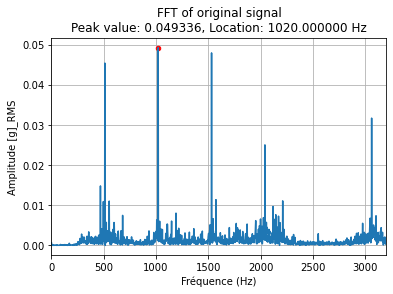

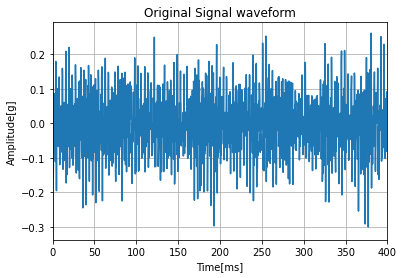

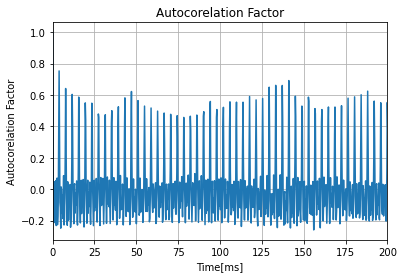

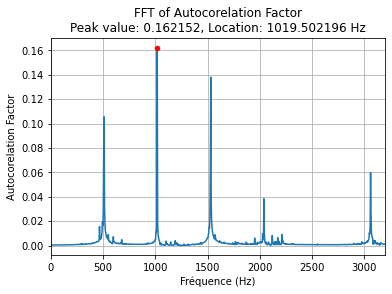

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter, freqz
from numpy.fft import fft, fftfreq

# read csv file and stored it in vibration_data

vibration_data = pd.read_csv("C:/Users\Angeleco\Desktop/Projet Prisca et Masa'il/BROYEUR VERTICAL [553]/P. INT 1  SUP  RED [557]/Global TEMPOREL Y [5070]/TWF.csv", sep = ";" , skiprows = 1)

# create  waveform data

x1=vibration_data["time[ms]"]/1000
y1=vibration_data[" amplitude[g]"]


# create FFT of filtered signal
N=y1.size # Number of samples
fs = 8192.0       # sample rate, Hz

Te = 1/fs # Sampling time

X = fft(y1)  # Fast Fourier Transform

freq = fftfreq(y1.size, 1/fs)  # Fast Fourier Transform Frequency

# Take only positif absolute value and  normalisation

X_abs = np.abs(X[:N//2])*2.0/N

freq_pos = freq[:N//2]

peakX = np.max(X_abs) # Find max peak

locX = np.argmax(X_abs) # Find its location

freq_posX = freq_pos[locX] # Get the actual frequency value

# New - Plot the max point
plt.plot(freq_posX, peakX, 'r.', markersize=9)

# New - Make title reflecting peak information
plt.title('FFT of original signal'+ '\n' + 'Peak value: %f, Location: %f Hz' % (peakX, freq_posX))

# Creation of FFT plot for positif frequency

fig = plt.figure(1)
freq_pos = freq[:N//2]
plt.plot(freq_pos, X_abs, label="Amplitude absolue")
plt.xlim(0, 0.390625*fs)  # zoom frequency
plt.grid()
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude [g]_RMS")

plt.show()
fig.savefig("Spectre FFT")

# Autocorrelation function calculation

df = vibration_data[" amplitude[g]"]
N= len(df)
y=[]
for j in range(0,(int(N/2)+1)):
    R=0    
    for i in range(0,(int(N/2))):
        R = R+ df[i]*df[i+j]
    y.append(R*2/N)
    
# Autocorrelation coefficient calculation

df = pd.DataFrame(y)
df.columns =['R']
R0=df.iloc[0,0]
R0
df['A'] = df['R']/R0
dt = vibration_data["time[ms]"]
t=[]
for i in range(len(df)):
    t.append(dt[i])
    
df['t']=t

x1=df["t"]
y1=df["A"]

# create FFT of autocorelation coef
N=y1.size # Number of samples

Te = 1/fs # Sampling time

X = fft(y1)  # Fast Fourier Transform

freq = fftfreq(y1.size, 1/fs)  # Fast Fourier Transform Frequency

# Take only positif absolute value and  normalisation

X_abs = np.abs(X[:N//2])*2.0/N

freq_pos = freq[:N//2]

peakX = np.max(X_abs) # Find max peak

locX = np.argmax(X_abs) # Find its location

freq_posX = freq_pos[locX] # Get the actual frequency value

# Plot waveform signal
fig = plt.figure(0)
x=vibration_data["time[ms]"]
y=vibration_data[" amplitude[g]"]
plt.plot(x,y)
plt.xlabel("Time[ms]")
plt.ylabel("Amplitude[g]")
plt.title("Original Signal waveform")
plt.xlim(0, 400)  # zoom TWF
fig.savefig("Signal wave form.png")
plt.grid()

plt.show()


# Plot figure of Autocorrelation coefficient
fig1 = plt.figure(1)

plt.plot(x1,y1)
plt.xlabel("Time[ms]")
plt.ylabel("Autocorelation Factor")
plt.title("Autocorelation Factor")
plt.xlim(0, 200)  # zoom 
fig1.savefig("Autocorelation Factor.png")
plt.grid()

plt.show()

fig = plt.figure(2)
freq_pos = freq[:N//2]
plt.plot(freq_pos, X_abs, label="Amplitude absolue")
plt.xlim(0, 0.390625*fs)  # zoom frequency
plt.grid()
plt.title('FFT of Autocorelation Factor'+ '\n' + 'Peak value: %f, Location: %f Hz' % (peakX, freq_posX))
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Autocorelation Factor")
plt.plot(freq_posX, peakX, 'r.', markersize=9)
plt.show()
fig.savefig("Spectre FFT.png")